## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd
# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,2019-12-17T18:19:00Z,¡¡¡IDEAL PROFESIONALES E INVERSORES¡¡¡ \nINFOC...,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete,Berruguete,0,0,0,0,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,2019-12-17T18:19:00Z,"Planta baja con cocinas, una de ellos posibili...",Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,0,0,0,0,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,2019-12-17T18:19:00Z,NaN,Torrelodones,España,Madrid,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN,Casco Antiguo,0,0,0,0,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,2019-12-17T18:18:00Z,"Piso de 3 dormitorios con armarios empotrados,...",Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velill

#### What is the most expensive home in the dataset? (★☆☆)

In [2]:
ds.sort_values(by='price', ascending=False).iloc[0]

Unnamed: 0                                                      13111
id_realEstates                                              132042636
isNew                                                           False
realEstate_name                            engel volkers torrelodones
phone_realEstate                                          911798512.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/vi...
rooms                                                            19.0
bathrooms                                                         NaN
surface                                                           NaN
price                                                         8500000
date                                             2019-12-19T12:29:00Z
description         El Palacio de El Enebral, la finca fue propied...
address                                                   El Escorial
country                                                        España
level1              

#### What is cheapest home in the dataset? (★☆☆)

In [3]:
ds.sort_values(by='price').iloc[0]

Unnamed: 0                                                       1004
id_realEstates                                              154000828
isNew                                                            True
realEstate_name                                              cr homes
phone_realEstate                                          914890664.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/ma...
rooms                                                             3.0
bathrooms                                                         2.0
surface                                                         104.0
price                                                               0
date                                             2019-12-28T10:30:00Z
description         C.R. HOMES INMOBILIARIA VENDE VIVIENDA EN GETA...
address                         Paseo del Licenciado Vidriera, Getafe
country                                                        España
level1              

#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [4]:
#biggest
ds.sort_values(by='surface', ascending=False).iloc[0]

#smallest
ds.sort_values(by='surface').iloc[0]

Unnamed: 0                                                        499
id_realEstates                                              152817874
isNew                                                           False
realEstate_name                                              toledo21
phone_realEstate                                          910757382.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/ma...
rooms                                                             1.0
bathrooms                                                         1.0
surface                                                          15.0
price                                                           85000
date                                     2019-12-28T19:04:44.6433814Z
description         ¡NO BUSQUES MÁS, YA LA HAS ENCONTRADO! . \n \n...
address                                 Calle Amparo,  Madrid Capital
country                                                        España
level1              

#### How many populations (level5) the dataset contains? (★☆☆)

In [5]:
ds['level5'].nunique()

168

#### Does the dataset contain NAs? (★☆☆)


In [6]:
ds.isnull().values.any()

True

#### Delete the NAs of the dataset, if applicable (★★☆)

In [7]:
ds2=ds.dropna()

ds2

ds2 = ds.dropna(axis=1)
pd.set_option('display.max_columns', None)
ds2
print(ds2.describe())

         Unnamed: 0  id_realEstates         price  countryId  level1Id  \
count  15335.000000    1.533500e+04  1.533500e+04    15335.0   15335.0   
mean    7668.000000    1.524371e+08  4.773036e+05        0.0       0.0   
std     4426.977524    2.277286e+06  5.912942e+05        0.0       0.0   
min        1.000000    1.221584e+08  0.000000e+00        0.0       0.0   
25%     3834.500000    1.519456e+08  1.690000e+05        0.0       0.0   
50%     7668.000000    1.532413e+08  2.800000e+05        0.0       0.0   
75%    11501.500000    1.538105e+08  5.400000e+05        0.0       0.0   
max    15335.000000    1.540033e+08  8.500000e+06        0.0       0.0   

       level2Id  level3Id  level4Id  level5Id  level6Id  level7Id  level8Id  \
count   15335.0   15335.0   15335.0   15335.0   15335.0   15335.0   15335.0   
mean        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0  

It is not that applicable to eliminate rows with NAN values, since all entries have at least one NAN value, but we can eliminate the rows which have them. Eliminating 12 of them, we have a dataframe that is fully without them. But this dataframe does not have key columns needed for the project, so the final answer is no, the resulting dataframe is not useful.

#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [8]:
arroyolinos = ds[ds['level5'].isin(['Arroyomolinos (Madrid)'])]
arroyolinos['price'].mean()

294541.59854014596

#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

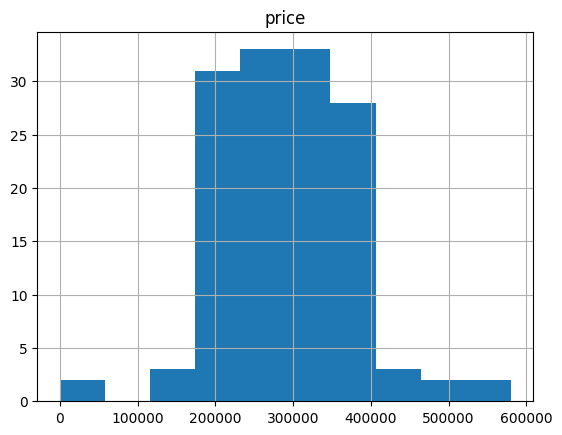

In [9]:
arroyolinos.hist('price')

We can see that the cost of living in Arroyomolinos is aorund 300000 and the majority of places don't fluctuate too much from the mean.

What I can see is that the prices are really close to the price mean of the region. Therefore, the mean is a good indicative of 

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [10]:
belt = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
south_belt = ds[ds['level5'].isin(belt)]
south_belt

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28T18:30:53.960102Z,"¡oportunidad! vivienda de obra nueva, local ad...","Avenida Carabancheles, 18, Alcorcón",España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Centro,Casco Antiguo,Casco Antiguo,0,0,0,0,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,2019-12-28T18:30:53.960102Z,VIVIENDAS365-VENDE- Hermosa Vivienda en el Bar...,"Avenida Los Pinos, Leganés",España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Valdepelayo - Montepinos - Arroyo Culebro,NaN,Valdepelayo - Montepinos - Arroyo Culebro,0,0,0,0,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,2019-12-28T18:32:32.5337942Z,AREA UNO asesores inmobiliarios oficina de las...,Alcorcón,España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Prado Santo Domingo - Ensanche,NaN,Prado Santo Domingo - Ensanche,0,0,0,0,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,2019-12-17T19:02:00Z,"Piso en Fuenlabrada, Madrid. Dispone de una su...","Urbanización Urbanización Parque Miraflores, 5...",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Loranca,NaN,Loranca,0,0,0,0,0,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,2019-12-17T18:57:00Z,"QUIERES VIVIR EN PLENO CENTRO, a tan sólo 2 m...",Leganés,España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Centro de Leganés,NaN,Centro de Leganés,0,0,0,0,0,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,2019-12-17T18:43:00Z,JADEIN FERRERO S.L vende excelente vivienda en...,Fuenlabrada,España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Fuenlabrada II - El Molino,NaN,Fuenlabrada II - El Molino,0,0,0,0,0,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,2019-12-17T18:25:00Z,´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´SI...,"Calle Dr. Miguel de Aguado, Fuenlabrada",España,Madrid,Madrid,Zona Sur

#### Make a bar plot of the median of prices (★★★) 

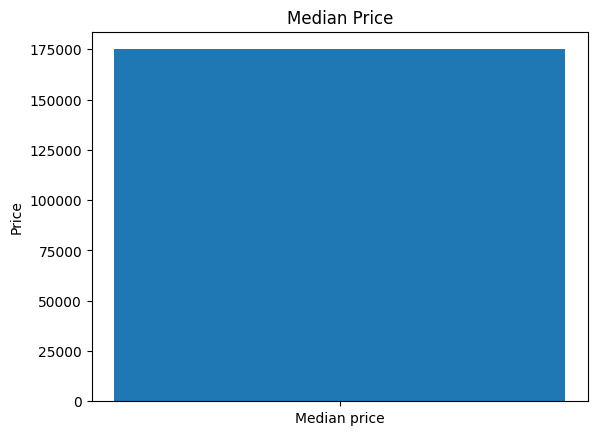

175000.0
223094.48070562293


array([[<Axes: title={'center': 'price'}>]], dtype=object)

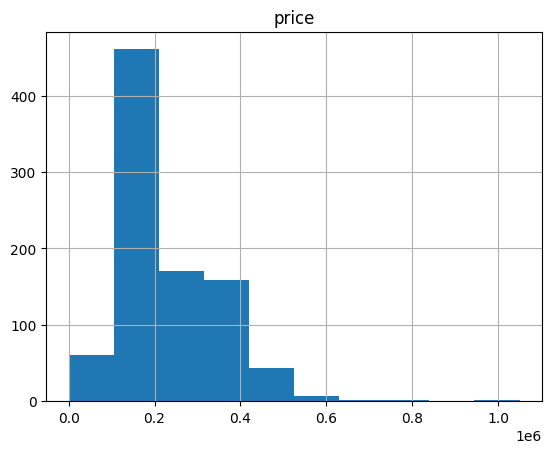

In [11]:
import matplotlib.pyplot as plt

median_price = south_belt['price'].median()

plt.bar('Median price', median_price)
plt.ylabel('Price')
plt.title('Median Price')

plt.show()
print(median_price)
print(south_belt['price'].mean())

south_belt.hist('price')

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [12]:
# Calculate the sample mean
mean_price = ds['price'].mean()
mean_rooms = ds['rooms'].mean()
mean_surface_area = ds['surface'].mean()
mean_bathrooms = ds['bathrooms'].mean()

# Calculate the sample variance
var_price = ds['price'].var()
var_rooms = ds['rooms'].var()
var_surface_area = ds['surface'].var()
var_bathrooms = ds['bathrooms'].var()

print("Sample mean:")
print("Price:", mean_price)
print("Rooms:", mean_rooms)
print("Surface Area:", mean_surface_area)
print("Bathrooms:", mean_bathrooms)

print("\nSample variance:")
print("Price:", var_price)
print("Rooms:", var_rooms)
print("Surface Area:", var_surface_area)
print("Bathrooms:", var_bathrooms)

Sample mean:
Price: 477303.56641669385
Rooms: 3.2316112668535575
Surface Area: 196.91643592474264
Bathrooms: 2.150233488992662

Sample variance:
Price: 349628868677.4539
Rooms: 1.9407455379492797
Surface Area: 4764433.8520764755
Bathrooms: 1.669469222949398


#### What is the most expensive home of each population? (★★☆) 

In [13]:
ds.groupby('level5')['price'].max()

level5
 Madrid Capital          8000000
Ajalvir                   345000
Alcalá de Henares         850000
Alcobendas               8000000
Alcorcón                  950000
                          ...   
Villar del Olmo           280000
Villarejo de Salvanés     226000
Villaviciosa de Odón     1900000
Villavieja del Lozoya     260000
Zarzalejo                 199000
Name: price, Length: 168, dtype: int64

#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

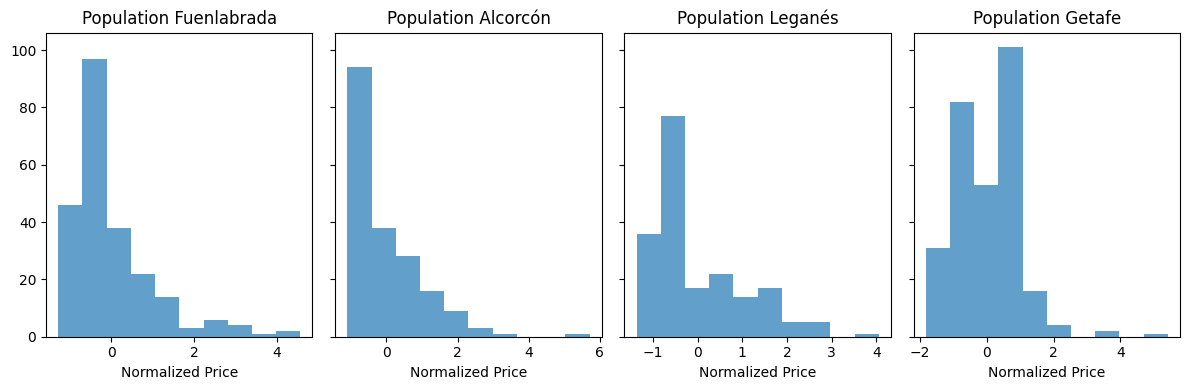

In [14]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

populations = south_belt['level5'].unique()
fig, axs = plt.subplots(1, len(populations), figsize=(12, 4), sharey=True)

for i, pop in enumerate(populations):
    # Select data for the current population
    pop_data = south_belt[south_belt['level5'] == pop]['price'].values.reshape(-1, 1)
    
    # Normalize prices within each population using StandardScaler
    scaler = StandardScaler()
    normalized_prices = scaler.fit_transform(pop_data)
    
    # Plot the histogram
    axs[i].hist(normalized_prices, bins=10, alpha=0.7)
    axs[i].set_title(f'Population {pop}')
    axs[i].set_xlabel('Normalized Price')

plt.tight_layout()
plt.show()

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [15]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [16]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
# Import necessary libraries
from ipyleaflet import Marker, AwesomeIcon

# List of values to subset
populations = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

# Define a dictionary to map values to marker colors
color_dict = {"Fuenlabrada": "blue", "Leganés": "green", "Getafe": "red", "Alcorcón": "purple"}

# Create a boolean mask for filtering
mask = ds['level5'].isin(populations)

# Apply the mask to the DataFrame to create the subset
subset_df = ds[mask]

# Filter out rows with 0 latitude and 0 longitude
subset_df = subset_df[(subset_df['latitude'] != '0') & (subset_df['longitude'] != '0')]

# Use list comprehension to create tuples from latitude and longitude columns
lat_list = [float(lat.replace(',', '.')) for lat in subset_df['latitude']]
long_list = [float(long.replace(',', '.')) for long in subset_df['longitude']]


# Loop through the latitude and longitude lists and add markers to the map
for i, (lat, long) in enumerate(zip(lat_list, long_list)):
    population = subset_df.iloc[i]['level5']
    color = color_dict.get(population, "black") 
    marker = Marker(location=(lat, long), icon=AwesomeIcon(name='house', marker_color=color), draggable=False)
    map.add_layer(marker)

# Display the map
map


Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

          count         mean         std         min          25%  \
level5                                                              
Alcorcón  173.0  2239.302480  539.951527  604.761905  1904.081633   
Getafe    241.0  2066.314949  741.872702    0.000000  1684.285714   

                  50%          75%          max  
level5                                           
Alcorcón  2207.792208  2472.727273  3698.159509  
Getafe    1973.333333  2628.787879  3827.160494  
T-statistic: nan
P-value: nan


/tmp/ipykernel_666/367351995.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_belt['price_m2'] = town_belt['price']/town_belt['surface']


<Figure size 800x600 with 0 Axes>

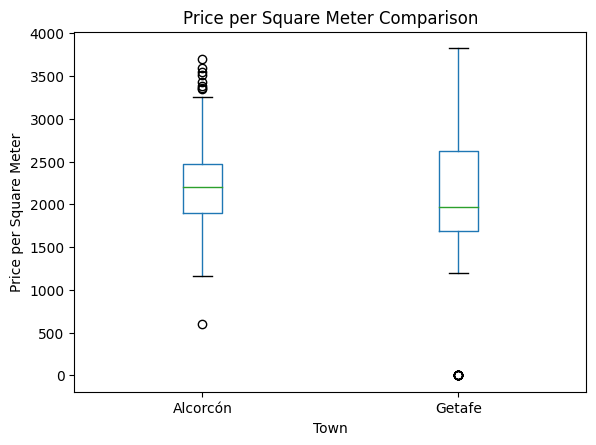

In [17]:
from scipy.stats import ttest_ind

towns = ['Getafe', 'Alcorcón']

town_belt = ds[ds['level5'].isin(towns)]

town_belt['price_m2'] = town_belt['price']/town_belt['surface']

summary_stats = town_belt.groupby('level5')['price_m2'].describe()

print(summary_stats)

# T-test
getafe_prices = town_belt[town_belt['level5'] == 'Getafe']['price_m2']
alcorcon_prices = town_belt[town_belt['level5'] == 'Alcorcón']['price_m2']
t_statistic, p_value = ttest_ind(getafe_prices, alcorcon_prices)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Visualization
plt.figure(figsize=(8, 6))
town_belt.boxplot(column='price_m2', by='level5', grid=False)
plt.title("Price per Square Meter Comparison")
plt.suptitle("")  # Remove the automatic title
plt.xlabel("Town")
plt.ylabel("Price per Square Meter")
plt.show()


#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [18]:
towns = ['Valdemorillo', 'Galapagar']

town_belt = ds[ds['level5'].isin(towns)]

town_belt['price_m2'] = town_belt['price']/town_belt['surface']

summary_stats = town_belt.groupby('level5')['price_m2'].describe()

print(summary_stats)

              count         mean         std         min          25%  \
level5                                                                  
Galapagar      75.0  1606.324030  482.943506  162.305725  1342.592593   
Valdemorillo   53.0  1317.950211  511.697215  347.727273   983.333333   

                      50%          75%     max  
level5                                          
Galapagar     1514.925373  1756.756757  3175.0  
Valdemorillo  1300.983607  1626.016260  2700.0  


/tmp/ipykernel_666/2586130722.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_belt['price_m2'] = town_belt['price']/town_belt['surface']


No, and there seems to be a larger difference than between Getafe and Alcorcón, by that metric.

#### What happens if we do the same analysis for price/m2 (★★☆) 

T-statistic: nan
P-value: nan


<Figure size 800x600 with 0 Axes>

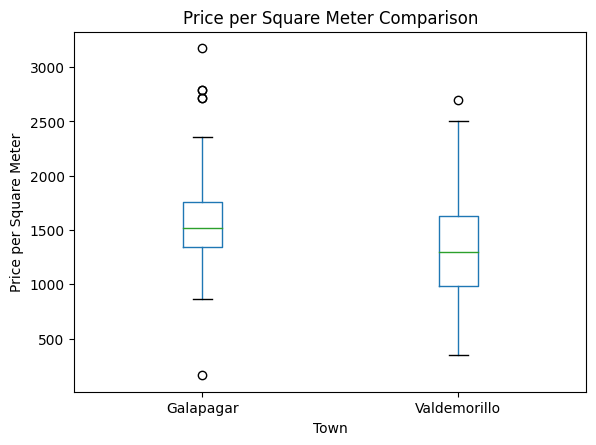

In [19]:
# T-test
valdemorillo_prices = town_belt[town_belt['level5'] == 'Valdemorillo']['price_m2']
galapagar_prices = town_belt[town_belt['level5'] == 'Galapagar']['price_m2']
t_statistic, p_value = ttest_ind(valdemorillo_prices, galapagar_prices)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Visualization
plt.figure(figsize=(8, 6))
town_belt.boxplot(column='price_m2', by='level5', grid=False)
plt.title("Price per Square Meter Comparison")
plt.suptitle("")  # Remove the automatic title
plt.xlabel("Town")
plt.ylabel("Price per Square Meter")
plt.show()

The boxplots seem to be more similar, which means that the price per square meter have a similar range between the two regions, even though the medians are different.

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

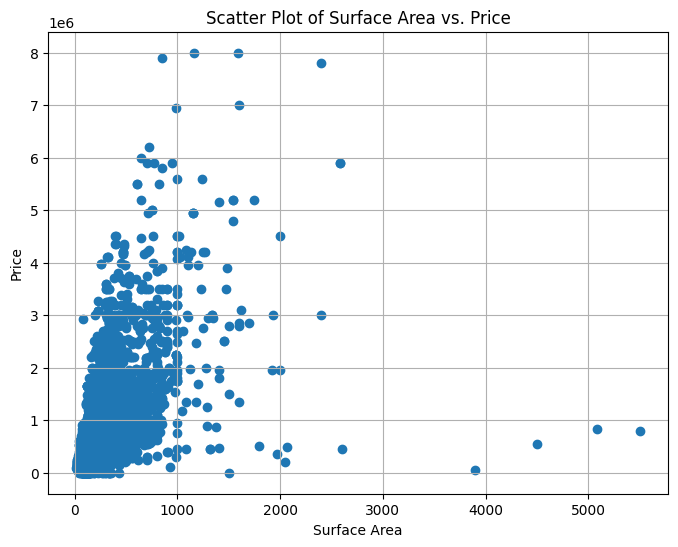

In [20]:
plt.figure(figsize=(8, 6))
ds2 = ds[ds['surface'] < 10000] #Had to do this to get a more readable plot, there are mansions in this dataset
plt.scatter(ds2['surface'], ds2['price'])
plt.title("Scatter Plot of Surface Area vs. Price")
plt.xlabel("Surface Area")
plt.ylabel("Price")
plt.grid(True)
plt.show()

You could make a linear correlation that generally describes the price increase in relation to surface area, barring some few outliers. 

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

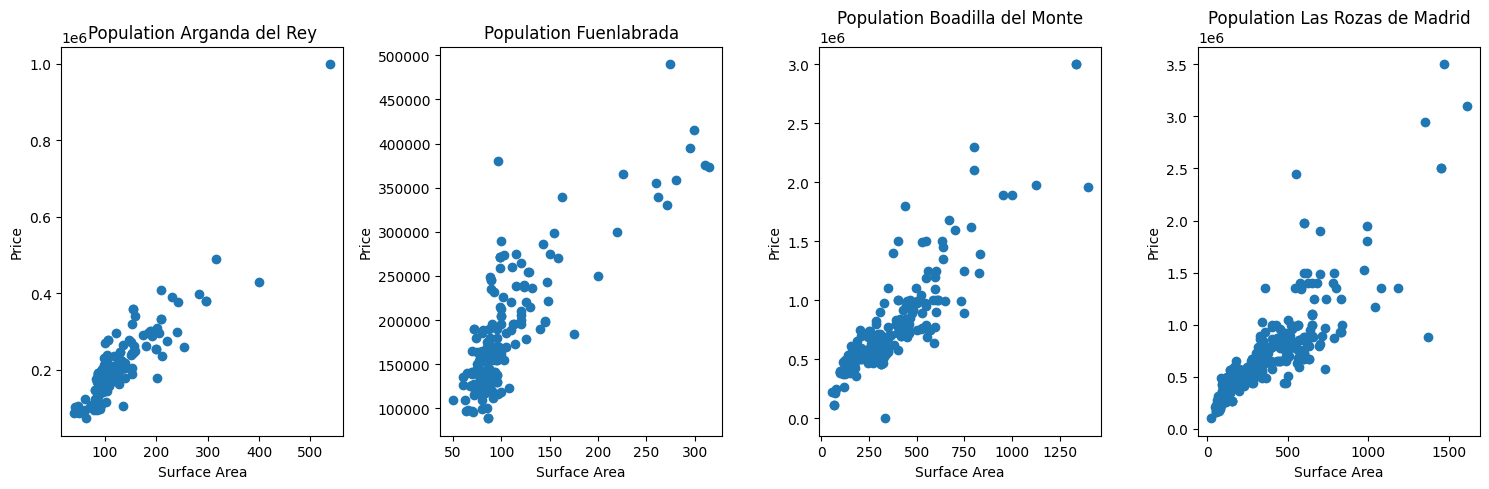

In [21]:
# let's do for the first 4 unique populations:

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

populations = list(ds['level5'].unique())

i = 0

for pop in populations[:4]:
    pop_data = ds[ds['level5'] == pop]
    axes[i].scatter(pop_data['surface'], pop_data['price'])
    axes[i].set_title(f"Population {pop}")
    axes[i].set_xlabel("Surface Area")
    axes[i].set_ylabel("Price")
    i += 1

plt.tight_layout()
plt.show()

#### How many  real estate agencies the dataset contains? (★★☆) 

In [22]:
len(ds['realEstate_name'].unique())

1822

#### What is the population (level 5) that contains the most houses? (★★☆) 

In [23]:
house_per_pop = ds.groupby('level5')['id_realEstates'].count()

maximum = house_per_pop.idxmax()

print("Population with the most houses:", maximum)

Population with the most houses:  Madrid Capital
